In [2]:
import sys
sys.path.insert(1, '/gscratch/stf/zachmon/covid/covid-bcr/scripts')
from utils import *

In [6]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [9]:
CONST_DATA_DICT = get_bcell_info('/gscratch/stf/zachmon/covid/covid-bcr/csvs/bulk_b_cell_info.csv')

In [27]:
def make_time_plot(colors):
    severity = ['Severe (5)','Moderate (12)','Mild (2)','Healthy (3)']
    se = [s1.split(" ")[0].split("/")[0] for s1 in severity]
    cohort_size = ['3','2','12','5']
    markers = ['o','s','^','h','D','*','d','2','v','x','.','p']
    num_severity = [0,0,0,0]
    fig=plt.figure(dpi=600,figsize=(12,3))
    for i,s in enumerate(severity):
        black_line = np.arange(0,80,5)
        pat = [i for bl in black_line]
        plt.plot(black_line,pat,color='black',zorder=0)
    num_severity = [0,0,0,0]
    times_plotted = {'Severe':[],
                     'Mild':[],
                     'Healthy':[],
                     'Moderate':[]}
    displacement = [0,0.3,-0.3,0.4,-0.4]
    for patient in CONST_DATA_DICT:
        condition = CONST_DATA_DICT[patient]['severity']
        ti = CONST_DATA_DICT[patient]['sample day']

        if type(condition) != str:
            ti = [0]
            condition = 'Healthy'

        index = se.index(condition)
        pat = []
        c = Counter(times_plotted[condition])
        for t in ti:
            pat.append(index + displacement[c[t]])
        
        times_plotted[condition] += ti
        si = 120
        fc = 'none'
        col = colors[condition]
        z=5
        lw = 1.2
        m = markers[num_severity[index]]
        if condition == 'Healthy' or condition == 'Mild':
            fc=colors[condition]
            col = colors[condition]
        if m == "D":
            si = 80
        if m == '*':
            si = 300
        if m == 'h' or m == 'd' or m == '*' or m == '.':
            if condition == 'Moderate':
                fc = '#E69F00'
                z=2
                col = '#E69F00'
        if condition == 'Severe' and num_severity[index] % 2 ==0:
            fc=col
        if fc != 'none':
            lw = 0
        if m == '2' or m == 'x':
            color=colors[condition]
            fc=colors[condition]
        plt.scatter(ti,pat,
                    marker=markers[num_severity[index]],
                    zorder=z,
                    s=si,
                    facecolors=fc,
                    color=col,
                    edgecolor=col,
                    linewidth=lw);
        num_severity[index]+=1
    plt.xticks(np.arange(0,80,5),fontsize=25);
    plt.xlabel('days after symptom onset',fontsize=25, family='Arial')
    plt.yticks(np.arange(0,4,1), severity, fontsize=25, family='Arial')
    seaborn.despine(left=True, bottom=True, right=True)
    fig.savefig('/gscratch/stf/zachmon/timeplot.pdf',bbox_inches='tight')

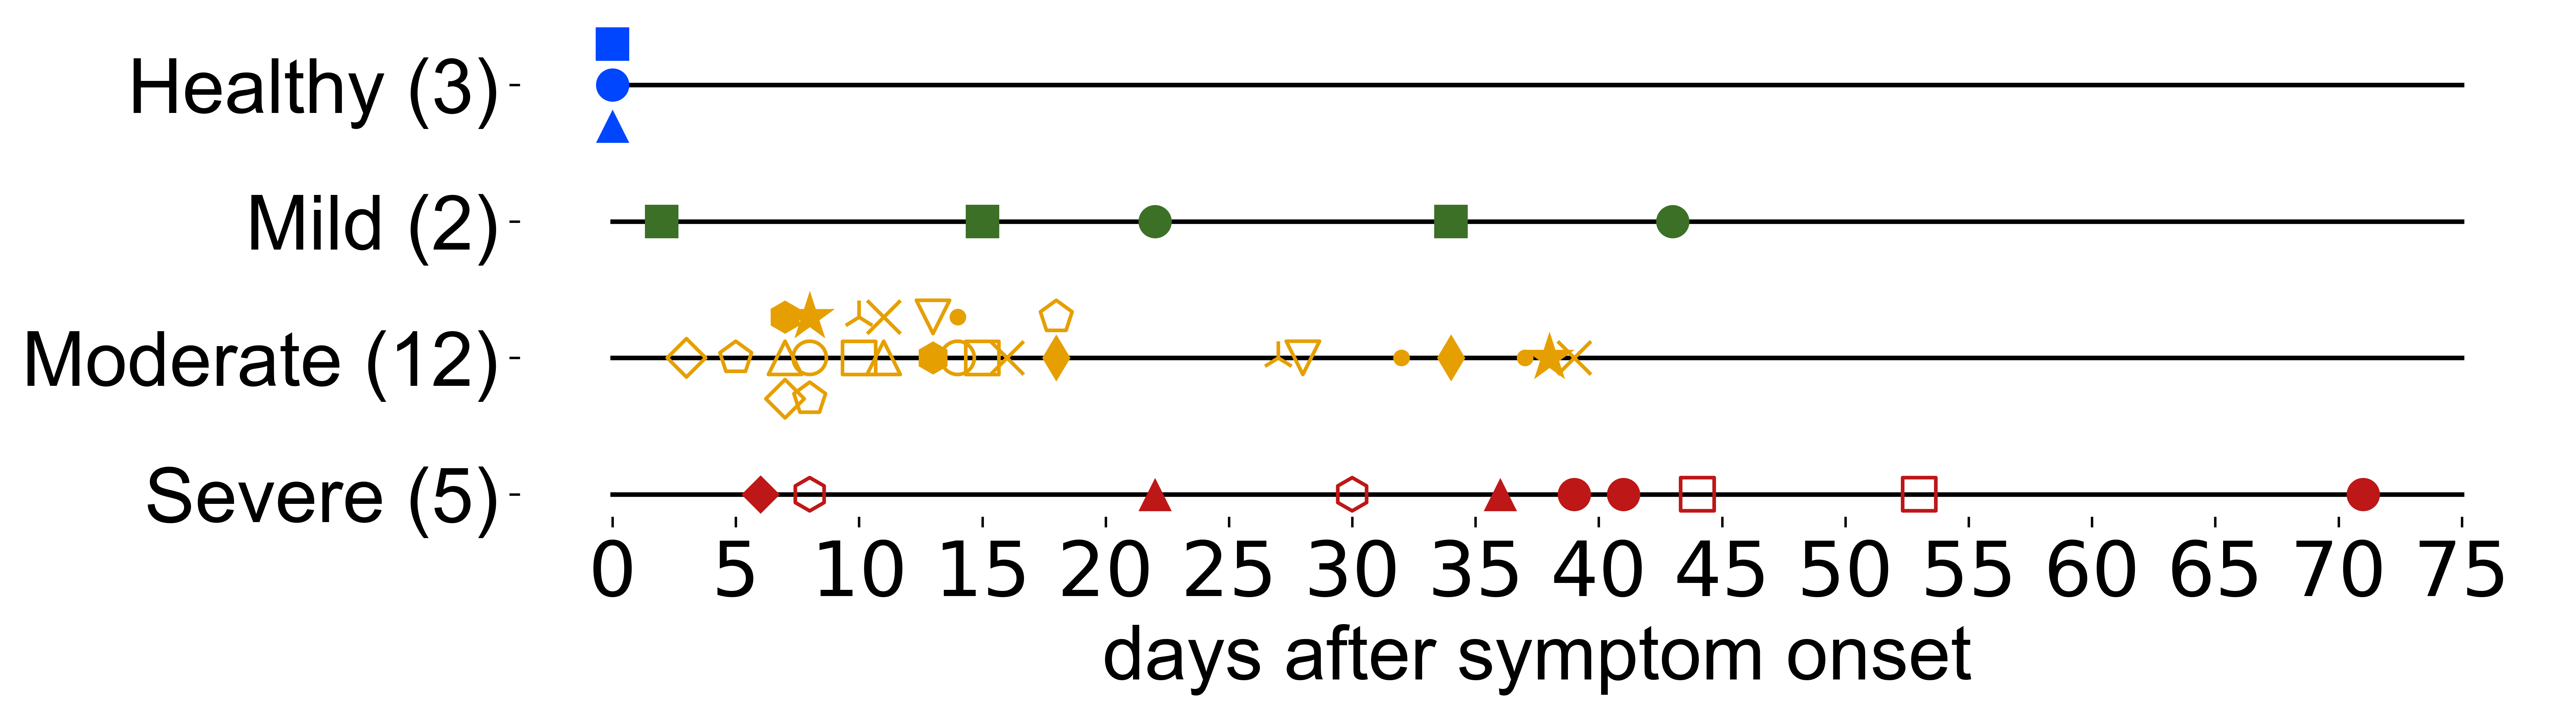

In [28]:
in_colors = {"Severe": (190/255, 23/255, 23/255),
          'Mild': (60/255,112/255,38/255),
          'Moderate': (230/255,159/255,0),
          'Healthy': (0,70/255,255/255)}

make_time_plot(in_colors)